In [110]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [111]:
T = [ x for x in range(10,110,10)]  
R = [4774,3186,2160,1488,1043,741,536,393,296,223]
df = pd.DataFrame([T,R]).T
df.columns=['Temp','R']

In [112]:
poly_features=PolynomialFeatures(degree=3, include_bias=False)

In [113]:
x_polly = poly_features.fit_transform(np.array([[x] for x in range(10,110,10)]))

In [114]:
lin_reg = LinearRegression()
lin_reg.fit(x_polly, df.to_numpy()[:,1])

LinearRegression()

In [115]:
lin_reg.intercept_, lin_reg.coef_

(6617.166666666207, array([-2.14963228e+02,  2.58775058e+00, -1.08199301e-02]))

<AxesSubplot:xlabel='Temp'>

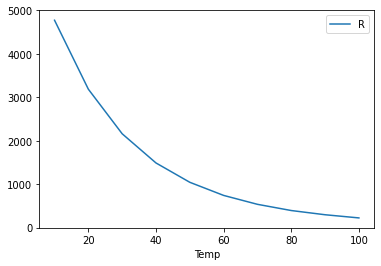

In [116]:
df = df.set_index('Temp')
df.plot()

In [117]:
result = pd.DataFrame([T,lin_reg.predict(x_polly)]).T
result.columns=['Temp', 'Estimated_R']
result = result.set_index('Temp')

<AxesSubplot:xlabel='Temp'>

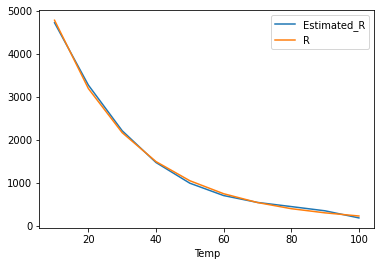

In [119]:
df = result.join(df,on='Temp')
df.plot()

In [120]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df.R.values,df.Estimated_R.values)

2412.900116550091